### Step 1: Importing and Merging Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the libraries

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # PLotting the graph
%matplotlib inline
import os # accessing directory structure
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [3]:
# Read the csv data

Original_data = pd.read_csv("credit-card-default.csv")
Original_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# Save the original data to another dataframe

defaulters = Original_data

### Step 2: Inspecting the Dataframe

In [5]:
# Let's see the head of our master dataset
defaulters.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
# Let's check the dimensions of the dataframe
defaulters.shape

(30000, 25)

In [7]:
# let's look at the statistical aspects of the dataframe
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
defaulters.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


- Observation:
- We can see that all the 25 Columns have 30000 count which indicates there is no missing value.
- We can see that the repayment status is indicated in columns PAY_0, PAY_2.... with PAY_1 column, so we can rename PAY_0 to PAY_1 for ease of understanding.

In [8]:
# Rename the columns PAY_0 and defaulted

defaulters.rename(columns={"defaulted":"def_pay"}, inplace=True)
defaulters.rename(columns={"PAY_0":"PAY_1"}, inplace=True)

In [9]:
# Let's see the type of each column
defaulters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

- Next we need check the datatype of each variable.
- We see that all the columns are int64 type whereas from previous knowledge we know that SEX, Education, MARRIAGE, PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6 and def_pay are categorical features.
- So the above variables should be converted to categorical.

In [10]:
# checking the datatype of each feature
defaulters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [11]:
# Check for any missing values
defaulters.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
def_pay      0
dtype: int64

- There are no missing values, hence no imputation, where we can directly move towards visualization of defaulters dataset.

- Before moving to visualization we first select some features which we feel would be most correlated to the target variable.
- From the data set we see that we want to predict whether a person will default in payment next month or not.
- This prediction depends mainly on the previous payment history, what is the limiting balance, age, education and marriage.

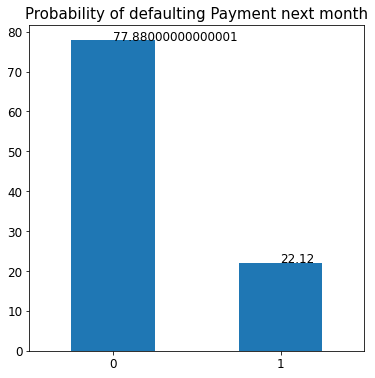

In [12]:
def_cnt = (defaulters.def_pay.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability of defaulting Payment next month",fontsize=15)
for x,y in zip([0,1], def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

From the above diagram we can infer the dataset consists of 77% clients are not expected to default next payments whereas 23% clients are expected to default the payment.

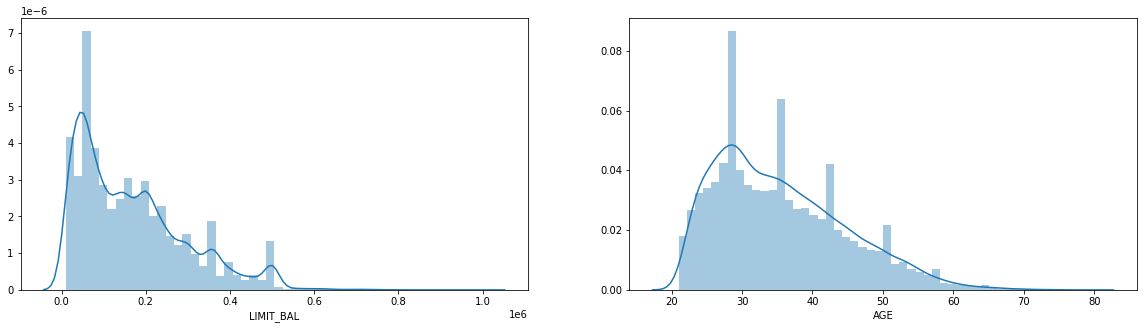

In [13]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(defaulters.LIMIT_BAL)

plt.subplot(122)
sns.distplot(defaulters.AGE)

plt.show()

- By plotting the continous variables we observe that dataset consists of skewed data of limiting balance and age of clients.
- We have more number of clients having limiting balance between 0 to 20000 currency..
- We have more number of clients from age bracket of 20 to 40, i.e clients from mostly young to mid aged groups..
- We will observe the effect of varaibles on target variable below


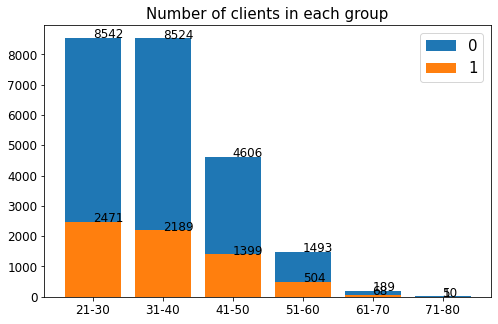

In [14]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
defaulters['AGE_BIN'] = pd.cut(x=defaulters.AGE, bins=bins, labels=names, right=True)

age_cnt = defaulters.AGE_BIN.value_counts()
age_0 = (defaulters.AGE_BIN[defaulters['def_pay'] == 0].value_counts())
age_1 = (defaulters.AGE_BIN[defaulters['def_pay'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x="AGE_BIN", y="LIMIT_BAl", hue=def_pay, ci=0)

plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each group", fontsize=15)
plt.legend(loc="upper right",fontsize=15)
plt.show()

- We have maximum clients from 21-30 age group followed by 31 - 40.
- Hence with increasing age group the number of clients that will default the payment next month is decreasing.
- Hence we can see that age is important feature to predict the default payment for next month.

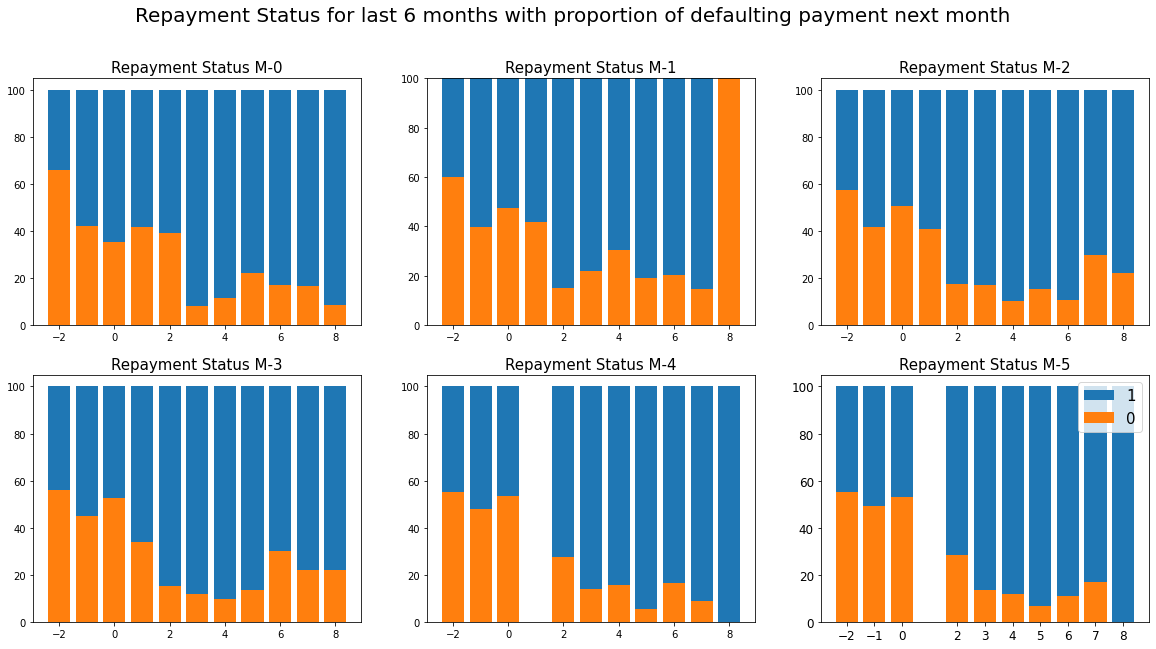

In [15]:
# Plot for all the payment status

plt.subplots(figsize=(20,10))

# Pay_1 column
ind = sorted(defaulters.PAY_1.unique())
pay_0 = (defaulters.PAY_1[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_1[defaulters['def_pay'] == 1].value_counts(normalize=True))
total = pay_0.values + pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(231)
plt.bar(ind,pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind,pay_0_prop, label='0')
plt.title("Repayment Status M-0", fontsize=15)

# Pay_2 column
ind = sorted(defaulters.PAY_2.unique())
pay_0 = (defaulters.PAY_2[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_2[defaulters['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values + pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(232)
plt.bar(ind,pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind,pay_0_prop, label='0')
plt.title("Repayment Status M-1", fontsize=15)

# Pay_3 column
ind = sorted(defaulters.PAY_3.unique())
pay_0 = (defaulters.PAY_3[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_3[defaulters['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values + pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(233)
plt.bar(ind,pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind,pay_0_prop, label='0')
plt.title("Repayment Status M-2", fontsize=15)

# Pay_4 column
ind = sorted(defaulters.PAY_4.unique())
pay_0 = (defaulters.PAY_4[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_4[defaulters['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values + pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(234)
plt.bar(ind,pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind,pay_0_prop, label='0')
plt.title("Repayment Status M-3", fontsize=15)

# Pay_5 column
ind = sorted(defaulters.PAY_5.unique())
pay_0 = (defaulters.PAY_5[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_5[defaulters['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(235)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-4", fontsize=15)

ind = sorted(defaulters.PAY_6.unique())
pay_0 = (defaulters.PAY_6[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_6[defaulters['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(236)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-5", fontsize=15)

plt.xticks(ind, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper right", fontsize=15)
plt.suptitle("Repayment Status for last 6 months with proportion of defaulting payment next month", fontsize=20)

plt.show()

- Observation
  - Above plots shows us the proportion of clients that will default payment next month based on repayment history.
  - For current month status, the earlier payments which are made lesser are the chances of those clients defaulting the payment.

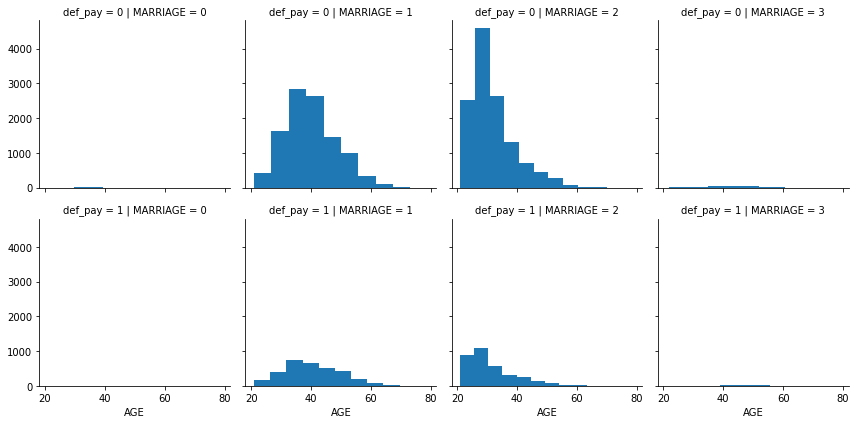

In [16]:
g = sns.FacetGrid(defaulters, row="def_pay", col="MARRIAGE")
g = g.map(plt.hist, 'AGE')
plt.show()

- From above plot we can infer that married people between age bracket of 30 and 50 and unmarried clients of age 20-30 tend to default payment with unmarried clients higher probability to default payment.
- Hence we can include the MARRIAGE feature of clients to find probability of defaulting the payment next month.

#### Infer the insights from the Sex Column

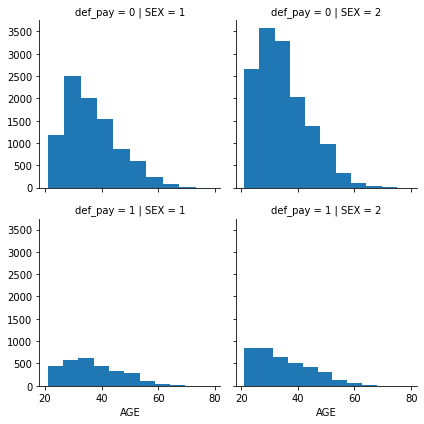

In [17]:
g = sns.FacetGrid(defaulters, row = "def_pay", col="SEX")
g = g.map(plt.hist, "AGE")

- It can be seen that females of age group 20-30 have very high tendency to default payment compared to males in all age brackets. Hence we can keep the SEX column of clients to predict probability of defaulting payment.

- We can verify if the past six months bill amount will affect the payment default next month or not:

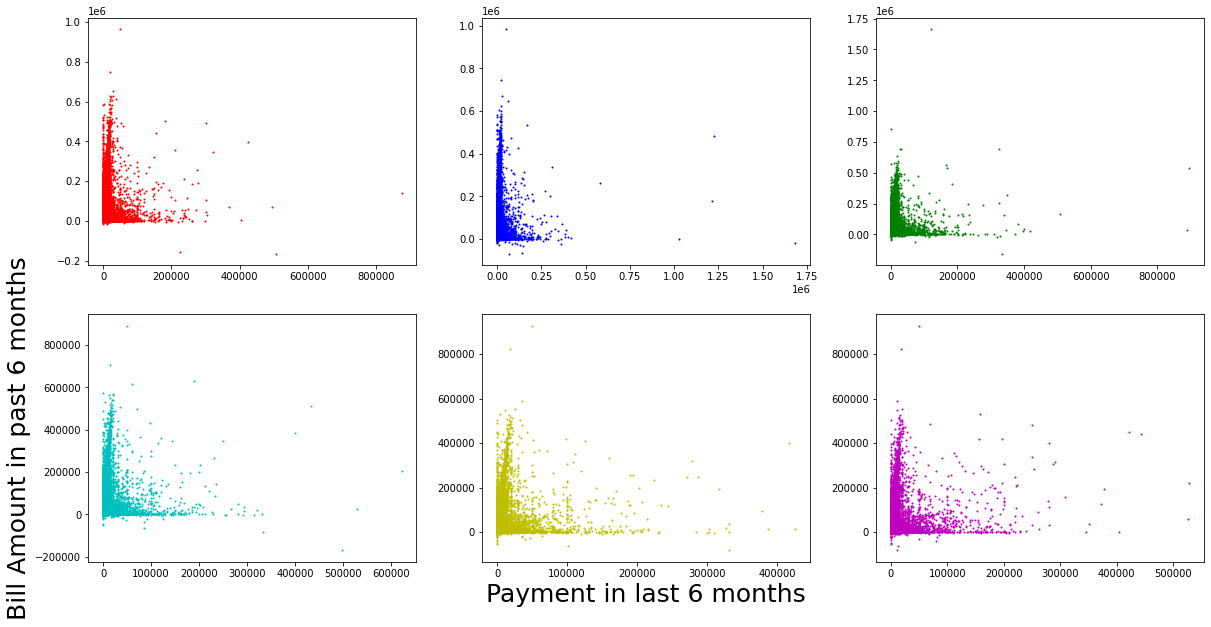

In [18]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=defaulters.PAY_AMT1, y= defaulters.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=defaulters.PAY_AMT2, y= defaulters.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=defaulters.PAY_AMT3, y= defaulters.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=defaulters.PAY_AMT4, y= defaulters.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=defaulters.PAY_AMT5, y= defaulters.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in last 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=defaulters.PAY_AMT6, y= defaulters.BILL_AMT5, c='m', s=1)

plt.show()

Above plots indicates that there is higher proportion of clients for whom the bill amount is high but payment done against the same is very low. This we can infer since maximum number of datapoints are closely packed along the Y-axis near to 0 on X-axis.

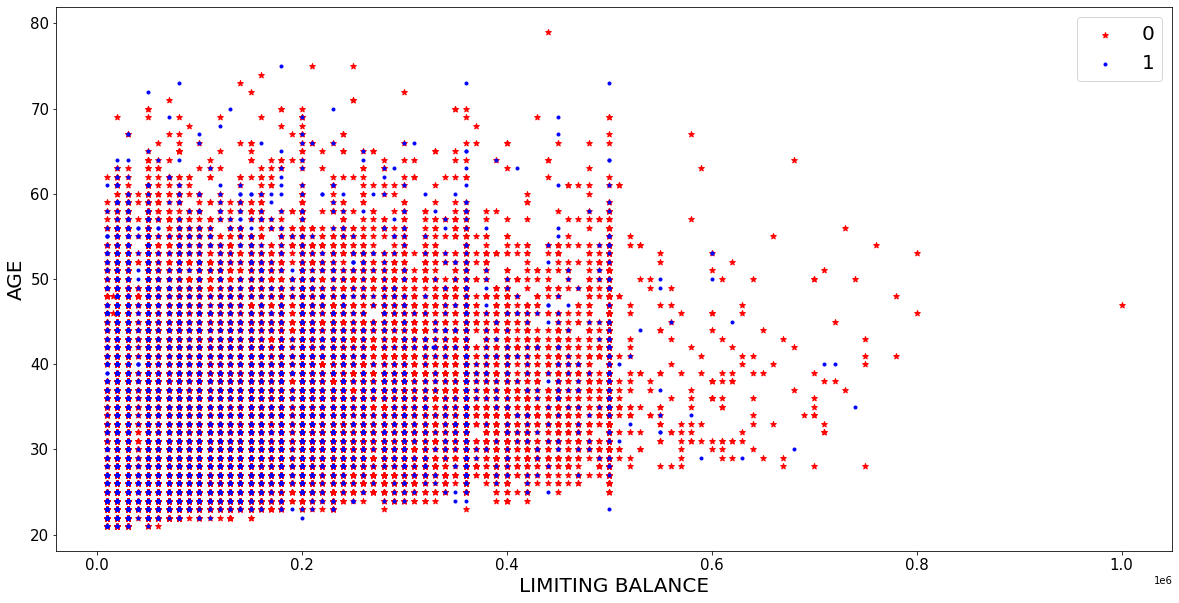

In [19]:
y1 = defaulters.AGE[defaulters["def_pay"] == 0]
y2 = defaulters.AGE[defaulters["def_pay"] == 1]
x1 = defaulters.LIMIT_BAL[defaulters["def_pay"] == 0]
x2 = defaulters.LIMIT_BAL[defaulters["def_pay"] == 1]

fig, ax = plt.subplots(figsize=(20,10))
plt.scatter(x1,y1, color="r", marker="*", label='0')
plt.scatter(x2,y2, color="b", marker=".", label='1')
plt.xlabel("LIMITING BALANCE",fontsize=20)
plt.ylabel("AGE",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc="upper right", fontsize=20)
plt.show()


Above plot of Age against limiting balance does not provide any accurate information , as there is mixed variation of clients of all age group and their current month limiting balance.

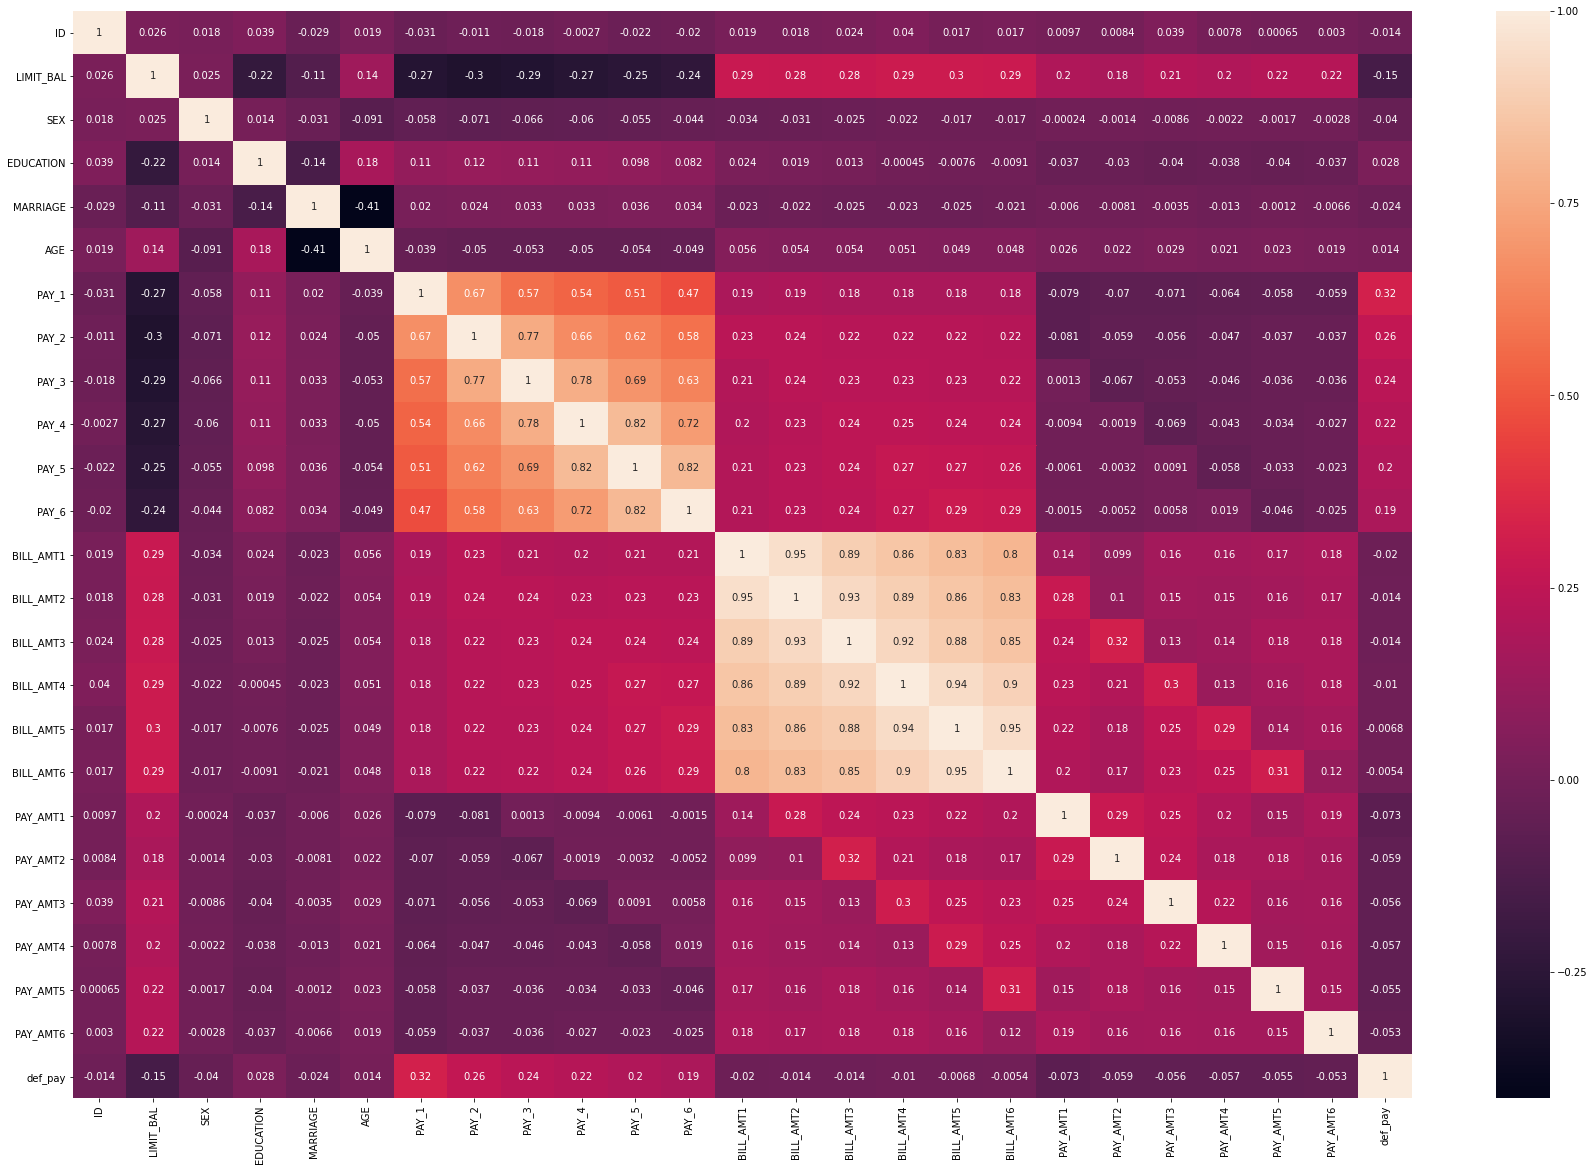

In [20]:
plt.subplots(figsize=(30,20))
sns.heatmap(defaulters.corr(), annot=True)
plt.show()

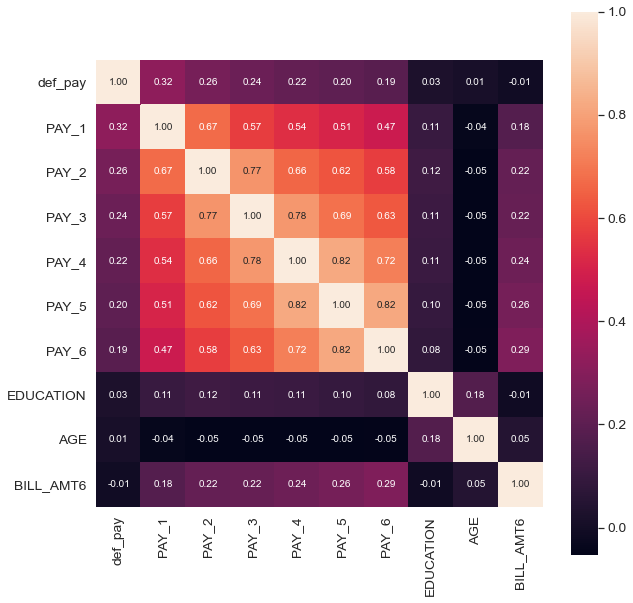

In [21]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
corrmat = defaulters.corr()
cols = corrmat.nlargest(k, 'def_pay')['def_pay'].index
cm = np.corrcoef(defaulters[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

We can see that next month default prediction is dependent on repayment status of past six months of all the features given to us. But there is multicollinearity between the repayment status features.

We will first train the model with all the features and try reducing the non-important features.

In [22]:
defaulters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         30000 non-null  int64   
 1   LIMIT_BAL  30000 non-null  int64   
 2   SEX        30000 non-null  int64   
 3   EDUCATION  30000 non-null  int64   
 4   MARRIAGE   30000 non-null  int64   
 5   AGE        30000 non-null  int64   
 6   PAY_1      30000 non-null  int64   
 7   PAY_2      30000 non-null  int64   
 8   PAY_3      30000 non-null  int64   
 9   PAY_4      30000 non-null  int64   
 10  PAY_5      30000 non-null  int64   
 11  PAY_6      30000 non-null  int64   
 12  BILL_AMT1  30000 non-null  int64   
 13  BILL_AMT2  30000 non-null  int64   
 14  BILL_AMT3  30000 non-null  int64   
 15  BILL_AMT4  30000 non-null  int64   
 16  BILL_AMT5  30000 non-null  int64   
 17  BILL_AMT6  30000 non-null  int64   
 18  PAY_AMT1   30000 non-null  int64   
 19  PAY_AMT2   30000 non-null

In [23]:
df_X = defaulters.drop(['def_pay',"AGE_BIN"], axis=1)
df_y = defaulters.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model1 = LogisticRegression()
model1.fit(X_train,y_train)

y_pred = model1.predict(X_test)

print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print("\n Accuracy Score for Model1: ", accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5998
           1       0.00      0.00      0.00         2

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000

[[4681 1317]
 [   2    0]]

 Accuracy Score for Model1:  0.7801666666666667


- We can see that all the examples are predicted to be negative to default payment next month with 75.7% accuracy whereas in the dataset we have 980 observations that are expected to default payment.
- After doing various random sampling by changing the random_state parameter, we found random_state = 10 to be giving highest accuracy for our model.

#### Let's now try changing the datatypes of categorical from int to category

In [24]:
# Changing the datatype of categorical features from integer to category

defaulters.SEX = defaulters.SEX.astype("category")
defaulters.EDUCATION = defaulters.EDUCATION.astype("category")
defaulters.MARRIAGE = defaulters.MARRIAGE.astype("category")
defaulters.PAY_1 = defaulters.PAY_1.astype("category")
defaulters.PAY_2 = defaulters.PAY_2.astype("category")
defaulters.PAY_3 = defaulters.PAY_3.astype("category")
defaulters.PAY_4 = defaulters.PAY_4.astype("category")
defaulters.PAY_5 = defaulters.PAY_5.astype("category")
defaulters.PAY_6 = defaulters.PAY_6.astype("category")
defaulters.def_pay = defaulters.def_pay.astype("category")

In [25]:
df_X = defaulters.drop(['def_pay',"AGE_BIN"], axis=1)
df_y = defaulters.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model2 = LogisticRegression()
model2.fit(X_train,y_train)

y_pred = model2.predict(X_test)

print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print("\n Accuracy Score for Model2: ", accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5998
           1       0.00      0.00      0.00         2

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000

[[4681 1317]
 [   2    0]]

 Accuracy Score for Model2:  0.7801666666666667


- Even after changing the dataype of certain variables there is no change in accuracy of the model.

- So we can evaluate now by dropping the multicollinearity variables and keeping only PAY_1 variables

In [26]:
defaulters.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay,AGE_BIN
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,21-30
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,21-30
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,31-40
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,31-40
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,51-60


In [27]:
df_X = defaulters.drop(['def_pay','AGE_BIN','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'], axis = 1)
df_y = defaulters.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model3 = LogisticRegression()
model3.fit(X_train,y_train)

y_pred = model3.predict(X_test)

print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print("\n Accuracy Score for Model3: ", accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5998
           1       0.00      0.00      0.00         2

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000

[[4681 1317]
 [   2    0]]

 Accuracy Score for Model3:  0.7801666666666667


From the above results Accuracy of the model has not much changed.

In [28]:
df_X = defaulters[['SEX','MARRIAGE','AGE','BILL_AMT1','EDUCATION','PAY_1']]
df_y = defaulters.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=20)

model4 = LogisticRegression()
model4.fit(X_train,y_train)

y_pred = model4.predict(X_test)
y_train_pred = model4.predict(X_train)

print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print("\n Test Accuracy Score for Model4: ", accuracy_score(y_pred,y_test))
print("\n Train Accuracy Score for Model4: ", accuracy_score(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      3000
           1       0.00      0.00      0.00         0

    accuracy                           0.78      3000
   macro avg       0.50      0.39      0.44      3000
weighted avg       1.00      0.78      0.88      3000

[[2334  666]
 [   0    0]]

 Test Accuracy Score for Model4:  0.778

 Train Accuracy Score for Model4:  0.7788888888888889


We can see that by removing the unimportant and multicollinear data, the accuracy has marginally increased by more than 2%.

In [30]:
df_X = defaulters[['SEX','MARRIAGE','AGE','BILL_AMT1','EDUCATION','PAY_1']]
df_y = defaulters.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=20)

model5 = RidgeClassifier()
model5.fit(X_train, y_train)

y_pred = model5.predict(X_test)
y_train_pred = model5.predict(X_train)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for model5: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model5: ', accuracy_score(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      8694
           1       0.11      0.70      0.18       306

    accuracy                           0.79      9000
   macro avg       0.55      0.75      0.53      9000
weighted avg       0.96      0.79      0.86      9000

[[6910 1784]
 [  93  213]]

Test Accuracy Score for model5:  0.7914444444444444

Train Accuracy Score for model5:  0.7915238095238095
